In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import cv2
%matplotlib inline
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# from IPython.display import clear_output

# import warnings
# warnings.filterwarnings('ignore')

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 1s 617ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


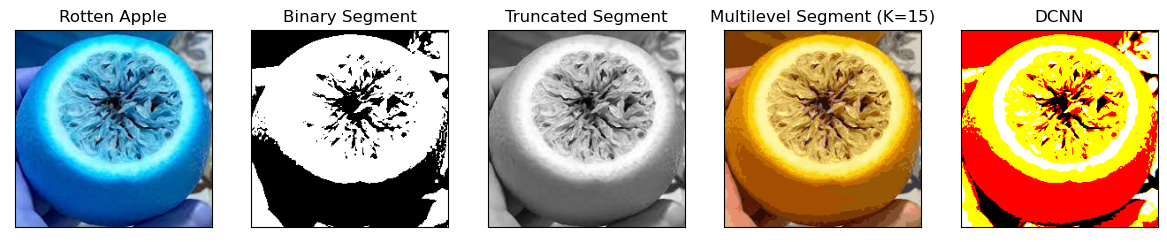

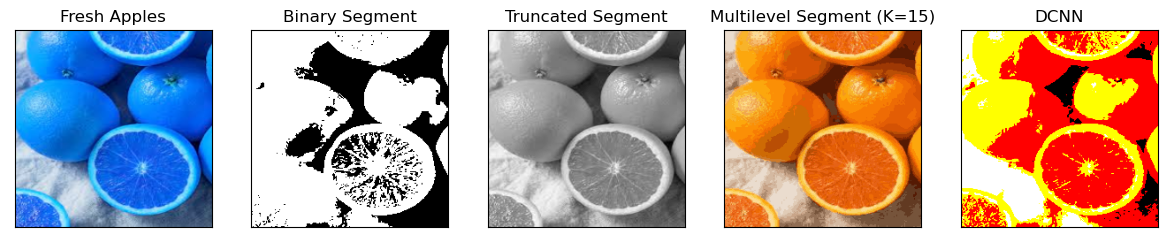

In [2]:
def segmentedImage(road1):
  vectorized = road1.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 30
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image




model = VGG16(weights='imagenet')

def DCNN_Image(image):
  img = np.expand_dims(image, axis=0)
  img = preprocess_input(img)
  preds = model.predict(img)
  top_preds = decode_predictions(preds, top=1)[0]
  return img.squeeze()



road = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten.jpeg')
road = cv2.resize(road, (224, 224))
road1 = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road1,cv2.COLOR_BGR2RGB)

figure_size = 30
plt.figure(figsize=(figure_size,figure_size))

imggray = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten.jpeg',0)
imggray = cv2.resize(imggray, (224, 224))

plt.subplot(2,10,1),plt.imshow(img)
plt.title('Rotten Apple'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,10,2),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,244,244,cv2.THRESH_TRUNC)
plt.subplot(2,10,3),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,4),plt.imshow(segmentedImage(road1))
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,5),plt.imshow(DCNN_Image(road))
plt.title('DCNN'), plt.xticks([]), plt.yticks([])




road = cv2.imread('Dataset_Orange/Single_Pred/freshoranges/fresh.jpeg')
road = cv2.resize(road, (224, 224))
road1 = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road1,cv2.COLOR_BGR2RGB)


figure_size = 30
plt.figure(figsize=(figure_size,figure_size))

imggray = cv2.imread('Dataset_Orange/Single_Pred/freshoranges/fresh.jpeg',0)
imggray = cv2.resize(imggray, (224, 224))

plt.subplot(2,10,6),plt.imshow(img)
plt.title('Fresh Apples'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,10,7),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,244,244,cv2.THRESH_TRUNC)
plt.subplot(2,10,8),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,9),plt.imshow(segmentedImage(road1))
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])


plt.subplot(2,10,10),plt.imshow(DCNN_Image(road))
plt.title('DCNN'), plt.xticks([]), plt.yticks([])

plt.show()

In [3]:
train_dir = 'Dataset_Orange/Train'
test_dir = 'Dataset_Orange/Single_Pred'
val_dir = 'Dataset_Orange/Test'

In [4]:
data_train = image_dataset_from_directory(train_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)
data_validation = image_dataset_from_directory(val_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)
data_test = image_dataset_from_directory(test_dir,labels='inferred',
                                       label_mode='binary',interpolation='nearest',image_size=[150,150],batch_size=64,
                                       shuffle=True)

Found 3058 files belonging to 2 classes.
Found 791 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [5]:
IMG_SIZE = (256, 256)

# data argumentation
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                       rotation_range=45,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True
                                       )

# data argumentation
test_datagen = ImageDataGenerator(rescale= 1 / 255.0)

train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=200, 
                                         shuffle=True,
                                         class_mode="categorical")
test_dataset = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

validation_dataset = train_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE), 
                                         color_mode="rgb",
                                         batch_size=64, 
                                         shuffle=True,
                                         class_mode="categorical")

Found 3058 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


In [6]:
# using mobilenetv2 model
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(256,256,3))
# make pre trained model into non trainable bcoz its takes much time
for layer in mobilenet.layers:
    layer.trainable = False

In [7]:
# Initialize the model in sequential
model = Sequential()
# add MobileNetV2 model into our sequence model
model.add(mobilenet)
# flatten the model
model.add(Flatten())
# Adding dense layers
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding output layer
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 128)               10485888  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 12,744,130
Trainable params: 10,486,146
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
# model compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=3,
                              verbose=1)

Epoch 1/3
16/16 [==============================] - 270s 16s/step - loss: 3.0766 - accuracy: 0.8221 - val_loss: 0.4850 - val_accuracy: 0.9545
Epoch 2/3
16/16 [==============================] - 312s 20s/step - loss: 0.2004 - accuracy: 0.9709 - val_loss: 0.1627 - val_accuracy: 0.9823
Epoch 3/3
16/16 [==============================] - 277s 17s/step - loss: 0.0910 - accuracy: 0.9807 - val_loss: 0.1069 - val_accuracy: 0.9848


In [10]:
model.evaluate(validation_dataset)

13/13 [==============================] - 52s 4s/step - loss: 0.1231 - accuracy: 0.9798


[0.12313512712717056, 0.9797724485397339]

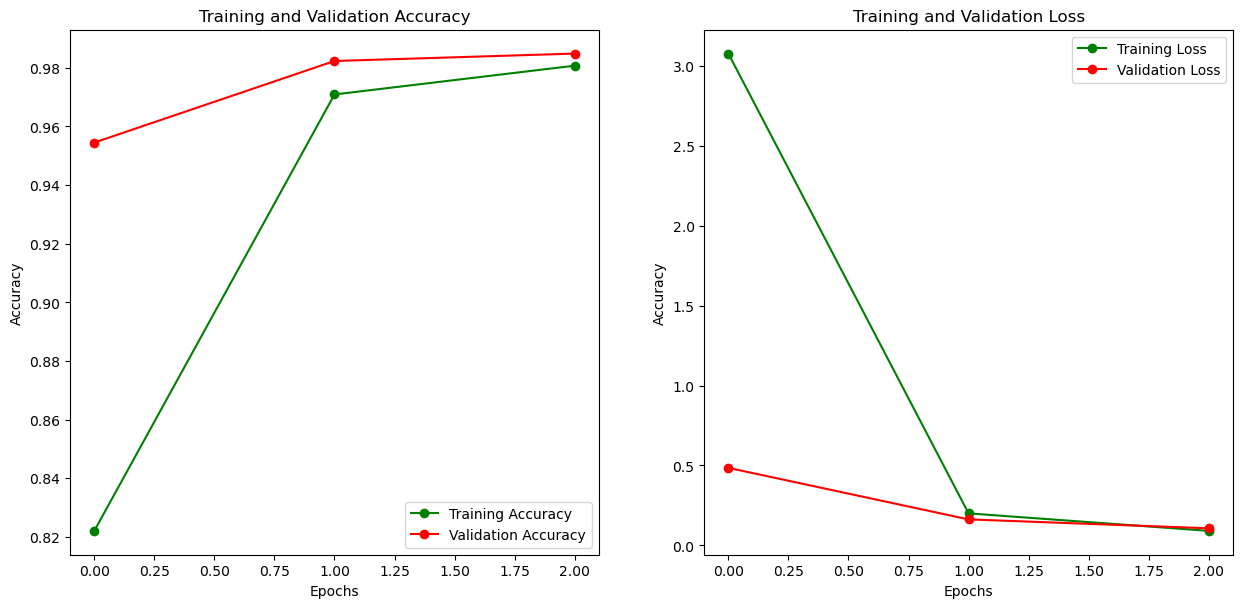

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,"go-", label='Training Accuracy')
plt.plot(epochs_range, val_acc,"ro-", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss,"go-", label='Training Loss')
plt.plot(epochs_range, val_loss,"ro-", label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [12]:
test_pred = model.predict(validation_dataset)

13/13 [==============================] - 54s 4s/step


In [13]:
output = [np.argmax(op) for op in test_pred]
df_output = pd.DataFrame(output)
print(df_output.value_counts())

1    408
0    383
dtype: int64


In [14]:
def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img,(256,256))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
    sample_mask_img = sample_mask_img/255.0
    res = np.argmax(model.predict(sample_mask_img))
    print(res)

1/1 [==============================] - 2s 2s/step
0


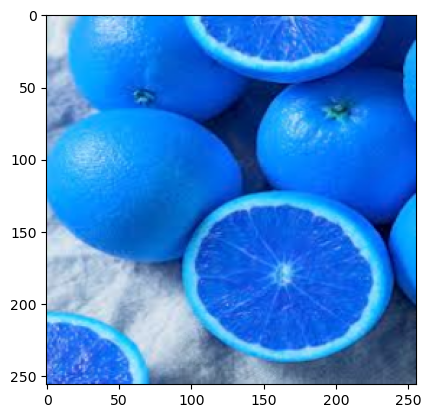

In [15]:
img_preprocessing('Dataset_Orange/Single_Pred/freshoranges/fresh.jpeg')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

test_steps_per_epoch = np.math.ceil(test_dataset.samples / test_dataset.batch_size)

predictions = model.predict_generator(test_dataset, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
import sklearn
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)
cm = confusion_matrix(test_dataset.classes, predicted_classes) 
print(cm)

report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27624\2340707645.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_dataset, steps=test_steps_per_epoch)


['freshoranges', 'rottenoranges']
[[0 3]
 [2 1]]
               precision    recall  f1-score   support

 freshoranges       0.00      0.00      0.00         3
rottenoranges       0.25      0.33      0.29         3

     accuracy                           0.17         6
    macro avg       0.12      0.17      0.14         6
 weighted avg       0.12      0.17      0.14         6



In [17]:
class_names = test_dataset.class_indices.keys()

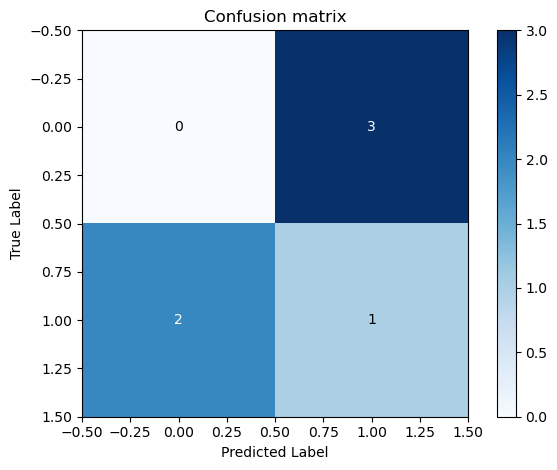

In [18]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
# tick_marks = np.arange(len(class_names))
# plt.xticks(test_dataset, class_names, rotation=45)
# plt.yticks(predicted_classes, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()